In [109]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [110]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [111]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [112]:
%matplotlib inline

In [113]:
%store -r X_relative_footsteps_acc
%store -r Y_relative_footsteps_acc
print(X_relative_footsteps_acc.shape)
print(Y_relative_footsteps_acc.shape)

(17646, 28)
(17646, 8)


# Multivariate Linear Regression (Foot prediction)

In [114]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [115]:
# Entries where FR is supporting
idxs = np.where(X_relative_footsteps_acc[:, 22] == 0)[0]
X_relative_footsteps_acc_FR_support = X_relative_footsteps_acc[idxs]
Y_relative_footsteps_acc_FR_support = Y_relative_footsteps_acc[idxs]

## Predict FR foot -> x

In [116]:
X_relative_footsteps_acc_FR_support[0, :]

array([ 0.        ,  0.        ,  0.        , -0.01667854,  0.02806931,
        0.04898649, -0.00293043,  0.04369139, -0.00966195,  0.22882891,
        0.16832004, -0.40987395,  0.23396882, -0.16832977, -0.40997042,
       -0.24291083,  0.16426133, -0.41338172, -0.24842681, -0.16367363,
       -0.41372354,  1.        ,  0.        ,  0.        ,  1.        ,
        0.1       ,  0.        ,  0.        ])

In [117]:
Y_relative_footsteps_acc_FR_support[0, :]

array([ 0.23372304,  0.17114156,  0.23612243, -0.16703353, -0.24142041,
        0.16586816, -0.24356714, -0.16141067])

### Linear Regression

In [127]:
# Input
X = np.hstack((X_relative_footsteps_acc_FR_support[:, :3], # prev velocity command
               X_relative_footsteps_acc_FR_support[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_FR_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_FR_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_FR_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_FR_support[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_FR_support[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_relative_support_x = LinearRegression()

# Fit the model
model_fr_relative_support_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_support_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.922050011319567
RMSE:  0.0056636819929347295
The lowest error is:  4.494150243616879e-08
The highest error is:  0.05207839540549705
The avg. error is:  0.0030230727292745547


In [130]:
model_fr_relative_support_x.coef_

array([[-2.20369038e-02, -1.40896067e-02, -2.40239291e-02,
         1.04523887e-01, -1.98485276e-04,  7.26833311e-03,
         2.53419644e-01,  2.83633427e-03,  5.54538153e-01,
        -4.57626068e-02, -4.89157898e-02, -1.47095453e-03,
         1.64291386e-01,  2.48700649e-02]])

In [128]:
model_fr_relative_support_x.intercept_

array([0.0656455])

Text(0, 0.5, 'Predictions')

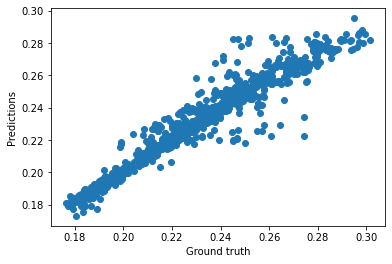

In [129]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [100]:
#%store model_fr_relative_support_x

In [101]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [102]:
# Save model
#joblib.dump(model_fr_relative_support_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_support_x.sav")

### Predict FR foot -> y

In [150]:
# Input
X = np.hstack((X_relative_footsteps_acc_FR_support[:, :3], # prev velocity command
               X_relative_footsteps_acc_FR_support[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_FR_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_FR_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_FR_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_FR_support[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_FR_support[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_fr_relative_support_y = LinearRegression()

# Fit the model
model_fr_relative_support_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_relative_support_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.8220563632575378
RMSE:  0.010927587363114492
The lowest error is:  2.3847707342206093e-06
The highest error is:  0.056430437458674904
The avg. error is:  0.007350086560164742


In [153]:
model_fr_relative_support_y.coef_

array([[-0.03875806, -0.02419546, -0.0111179 , -0.00264573,  0.1031444 ,
         0.16616139,  0.03735991,  0.34677449,  0.16786598,  0.51771063,
         0.05097792, -0.0600186 ,  0.43818349,  0.02710729]])

In [154]:
model_fr_relative_support_y.intercept_

array([-0.04993396])

Text(0, 0.5, 'Predictions')

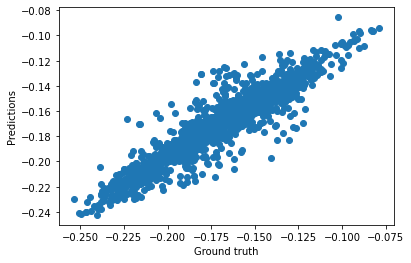

In [152]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [90]:
#%store model_fr_relative_support_y

In [19]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [91]:
# Save model
#joblib.dump(model_fr_relative_support_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_fr_relative_support_y.sav")